In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('restaurant-2-orders.csv')

EDA for Takeaway Food Order

Raw Data consistof Order ID, Order Date, Item Name, Quantity, Product Price and Total Product

EDA for this data as follows
1. The Busiest Week in Month and Day based on Quantity Sold
2. The Busiest Hour based on Quantity Sold
3. The Most Popular Takeaway Dish based on Quantity Sold
4. Checking Price per Product of Top 10 Dish
5. Checking The Most Expensive Food and its popularity for being takeaway
6. Food Takeaway with the highest revenue
7. Menu Package Recommendation combining the most popular food main dish with the least popular food as side dish in the package menu - enhance revenue from the least popular foods

In [3]:
df.head()

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products
0,25583,03/08/2019 21:58,Tandoori Mixed Grill,1,11.95,12
1,25583,03/08/2019 21:58,Madras Sauce,1,3.95,12
2,25583,03/08/2019 21:58,Mushroom Rice,2,3.95,12
3,25583,03/08/2019 21:58,Garlic Naan,1,2.95,12
4,25583,03/08/2019 21:58,Paratha,1,2.95,12


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119183 entries, 0 to 119182
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Order ID        119183 non-null  int64  
 1   Order Date      119183 non-null  object 
 2   Item Name       119183 non-null  object 
 3   Quantity        119183 non-null  int64  
 4   Product Price   119183 non-null  float64
 5   Total products  119183 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.5+ MB


In [5]:
df['Order Date'] = df['Order Date'].astype('datetime64')

In [6]:
df.head()

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products
0,25583,2019-03-08 21:58:00,Tandoori Mixed Grill,1,11.95,12
1,25583,2019-03-08 21:58:00,Madras Sauce,1,3.95,12
2,25583,2019-03-08 21:58:00,Mushroom Rice,2,3.95,12
3,25583,2019-03-08 21:58:00,Garlic Naan,1,2.95,12
4,25583,2019-03-08 21:58:00,Paratha,1,2.95,12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119183 entries, 0 to 119182
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Order ID        119183 non-null  int64         
 1   Order Date      119183 non-null  datetime64[ns]
 2   Item Name       119183 non-null  object        
 3   Quantity        119183 non-null  int64         
 4   Product Price   119183 non-null  float64       
 5   Total products  119183 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 5.5+ MB


## Extracting Important Time Category from Order Date

In [8]:
DateTime = df['Order Date'].dt

In [9]:
df['Month'] = DateTime.month

In [10]:
df['Month Name'] = DateTime.month_name()

In [11]:
df.head()

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products,Month,Month Name
0,25583,2019-03-08 21:58:00,Tandoori Mixed Grill,1,11.95,12,3,March
1,25583,2019-03-08 21:58:00,Madras Sauce,1,3.95,12,3,March
2,25583,2019-03-08 21:58:00,Mushroom Rice,2,3.95,12,3,March
3,25583,2019-03-08 21:58:00,Garlic Naan,1,2.95,12,3,March
4,25583,2019-03-08 21:58:00,Paratha,1,2.95,12,3,March


In [12]:
df['Year'] = DateTime.year

In [13]:
df['Day'] = DateTime.day_name()

In [14]:
df['Day_Num'] = DateTime.dayofweek

In [15]:
df['Date of Month'] = DateTime.day

In [16]:
df['WeekEnd'] = df['Day_Num'].apply(lambda x: 'Yes' if x > 4 else 'No')

In [17]:
df['Month_Period'] = df['Date of Month'].apply(lambda x: 'Month Beginning' if x < 15 else 'Month End')

In [18]:
def parse_values(x):
    if x < 8:
       return 'First Week'
    elif 8 <= x < 15:
       return 'Second Week'
    elif 16 <= x < 22:
       return 'Third Week'
    else:
       return 'Fourth Week'

In [19]:
df['Week_in_Month'] = df['Date of Month'].apply(parse_values)

In [20]:
df['Hour'] = DateTime.hour

In [21]:
df.head()

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products,Month,Month Name,Year,Day,Day_Num,Date of Month,WeekEnd,Month_Period,Week_in_Month,Hour
0,25583,2019-03-08 21:58:00,Tandoori Mixed Grill,1,11.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21
1,25583,2019-03-08 21:58:00,Madras Sauce,1,3.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21
2,25583,2019-03-08 21:58:00,Mushroom Rice,2,3.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21
3,25583,2019-03-08 21:58:00,Garlic Naan,1,2.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21
4,25583,2019-03-08 21:58:00,Paratha,1,2.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21


In [22]:
## Generate Total Price

In [23]:
df['Total Price'] = df['Quantity'] * df['Product Price']

In [24]:
df.head()

,Order ID,Order Date,Item Name,Quantity,Product Price,Total products,Month,Month Name,Year,Day,Day_Num,Date of Month,WeekEnd,Month_Period,Week_in_Month,Hour,Total Price
0,25583,2019-03-08 21:58:00,Tandoori Mixed Grill,1,11.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,11.95
1,25583,2019-03-08 21:58:00,Madras Sauce,1,3.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,3.95
2,25583,2019-03-08 21:58:00,Mushroom Rice,2,3.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,7.90
3,25583,2019-03-08 21:58:00,Garlic Naan,1,2.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,2.95
4,25583,2019-03-08 21:58:00,Paratha,1,2.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,2.95


## Visualize Food Order against Total Price over the year

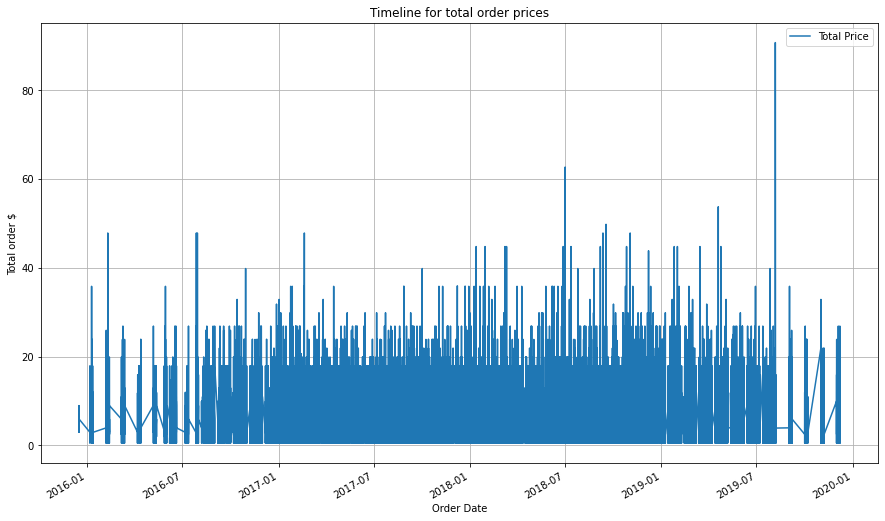

In [25]:
df[['Order Date', 'Total Price']].set_index('Order Date').plot(kind='line', figsize=(15,9))
plt.title('Timeline for total order prices')
plt.ylabel('Total order $')
plt.grid()
plt.show()

## Showing The Busiest Week in Month and Day based on Quantity Sold

This analysis help to allocate number of people in the kitchen to prepare food based on the time given or provide special cashier for takeaway order so it won't mixed with dine in order


In [26]:
## Creating table to group quantity sold based week in month and Day

df[['Week_in_Month','Day','Quantity']].groupby(['Week_in_Month','Day']).agg('sum').sort_values('Quantity', ascending=False).head(5)

Quantity
Week_in_Month Day               
Fourth Week   Saturday     17157
              Friday       10894
Third Week    Saturday      9285
Fourth Week   Sunday        7856
Third Week    Friday        6286

We get insight from table above, but it still not yet define the peak hour of the restaurants

## Showing The Busiest Hour based on Quantity Sold

This analysis help to allocate number of people in the kitchen to prepare food based on the time given

In [27]:
df[['Hour', 'Quantity']].groupby(['Hour']).agg('sum').sort_values('Quantity', ascending=False)

,Quantity
Hour,
18,45191
19,37387
17,28846
20,17818
21,6533
16,5263
22,2326
15,1565
13,1205


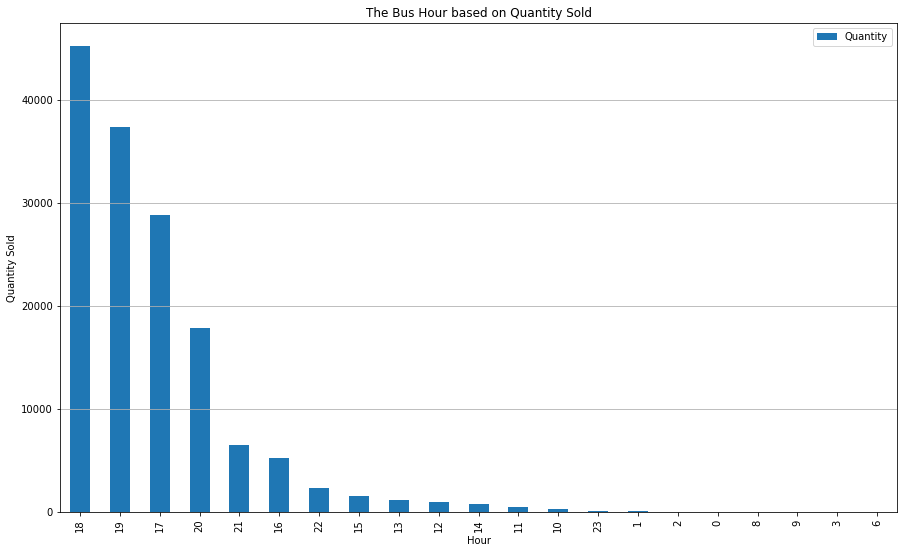

In [28]:
df[['Hour', 'Quantity']].groupby(['Hour']).agg('sum').sort_values('Quantity', ascending=False).plot(kind='bar',figsize=(15,9))
plt.title('The Bus Hour based on Quantity Sold')
plt.ylabel('Quantity Sold')
plt.grid(axis='y')
plt.show()

In [29]:
# breakdown the busy hour into week in month and day for worker efficiency.

df[['Week_in_Month','Day', 'Hour', 'Quantity']].groupby(['Week_in_Month','Day', 'Hour']).agg('sum').sort_values('Quantity', ascending=False).head(10)

Quantity
Week_in_Month Day      Hour          
Fourth Week   Saturday 18        5558
                       19        4253
                       17        3620
              Friday   19        3234
Third Week    Saturday 18        3181
Fourth Week   Friday   18        2968
Third Week    Saturday 19        2185
Fourth Week   Sunday   17        2104
                       18        2074
Third Week    Friday   18        1833

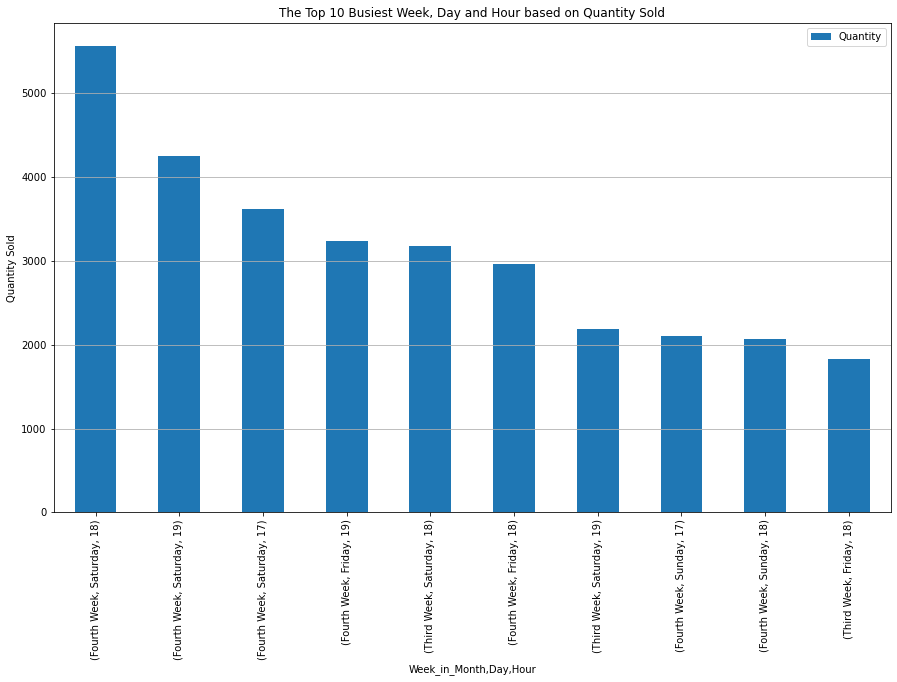

In [30]:
df[['Week_in_Month','Day', 'Hour', 'Quantity']].groupby(['Week_in_Month','Day', 'Hour']).agg('sum').sort_values('Quantity', ascending=False).head(10).plot(kind='bar',figsize=(15,9))
plt.title('The Top 10 Busiest Week, Day and Hour based on Quantity Sold')
plt.xticks(rotation=90)
plt.ylabel('Quantity Sold')
plt.grid(axis='y')
plt.show()

Based  on the last 2 bar plot. We can conclude that the peak hour of restaurant (at takeaway order) is between 17.00 - 20.00. 
In addition, We also able to identified that Friday, Saturday and Sunday on Third Week and Fourth Week of the month also the peak time for the restaurant takeaway order

## Showing The Busiest Week in Month and Day based on Order Volume

This analysis help to allocate number of people for Cashier to serve customer based on the time given

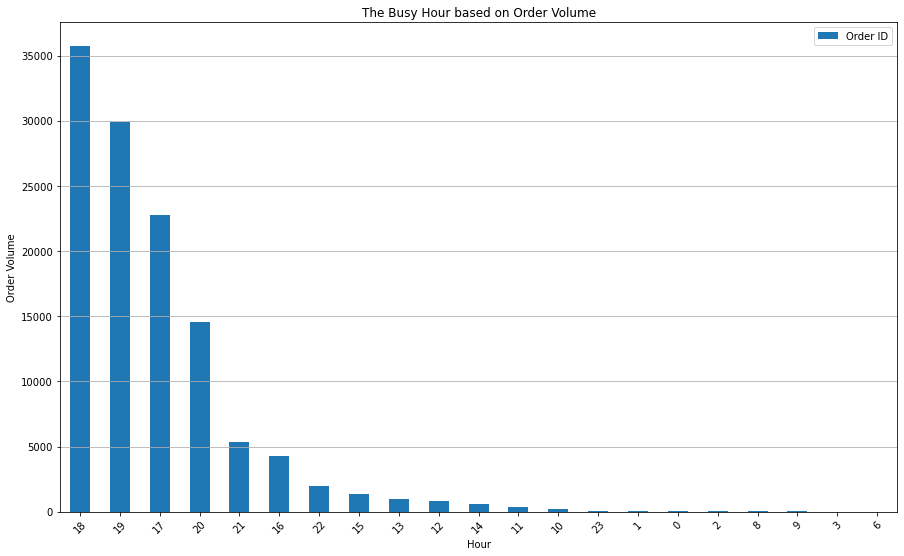

In [31]:
df.groupby('Hour')['Order ID'].count().sort_values(ascending=False).to_frame().plot(kind='bar',figsize=(15,9))
plt.title('The Busy Hour based on Order Volume')
plt.xticks(rotation=45)
plt.ylabel('Order Volume')
plt.grid(axis='y')
plt.show()

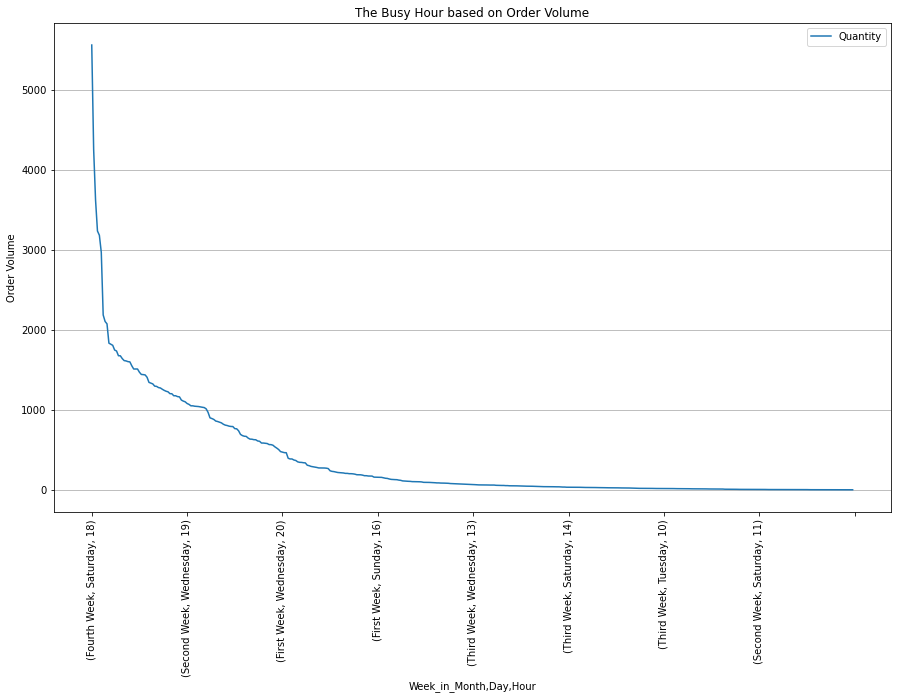

In [32]:
df[['Week_in_Month','Day', 'Hour', 'Quantity']].groupby(['Week_in_Month','Day', 'Hour']).agg('sum').sort_values('Quantity', ascending=False).plot(kind='line',figsize=(15,9))
plt.title('The Busy Hour based on Order Volume')
plt.xticks(rotation=90)
plt.ylabel('Order Volume')
plt.grid(axis='y')
plt.show()

The last 2 graph are proving that order volume is in line with quantity sold

## The Most Popular Dish based on Quantity Sold

In [33]:
## Creating table to group quantity sold based on Food Item

df_item_food = df[['Item Name', 'Quantity']].groupby('Item Name', as_index=False).agg(sum).sort_values('Quantity',ascending=False)
df_item_food

,Item Name,Quantity
262,Plain Papadum,18056
261,Pilau Rice,11754
233,Naan,8730
123,Garlic Naan,4809
29,Bombay Aloo,4336
...,...,...
91,Cylon - prawn,1
210,Methi - King Prawn,1
26,Bombay - Prawn,1
101,Dhansak - king-prawn,1


In [34]:
#calculating percentage of each item, quantity sold each item divided by all quantity sold and get the Top 10 Food percentage

df_item_food['% Quantity'] = round((df_item_food['Quantity']/df_item_food['Quantity'].sum())*100,2).to_frame()
Top10_Food = df_item_food.head(10)
Top10_Food

,Item Name,Quantity,% Quantity
262,Plain Papadum,18056,12.13
261,Pilau Rice,11754,7.90
233,Naan,8730,5.87
123,Garlic Naan,4809,3.23
29,Bombay Aloo,4336,2.91
204,Mango Chutney,4124,2.77
64,Chicken Tikka Masala,3970,2.67
234,Onion Bhaji,3965,2.66
263,Plain Rice,3532,2.37
231,Mushroom Rice,3424,2.30


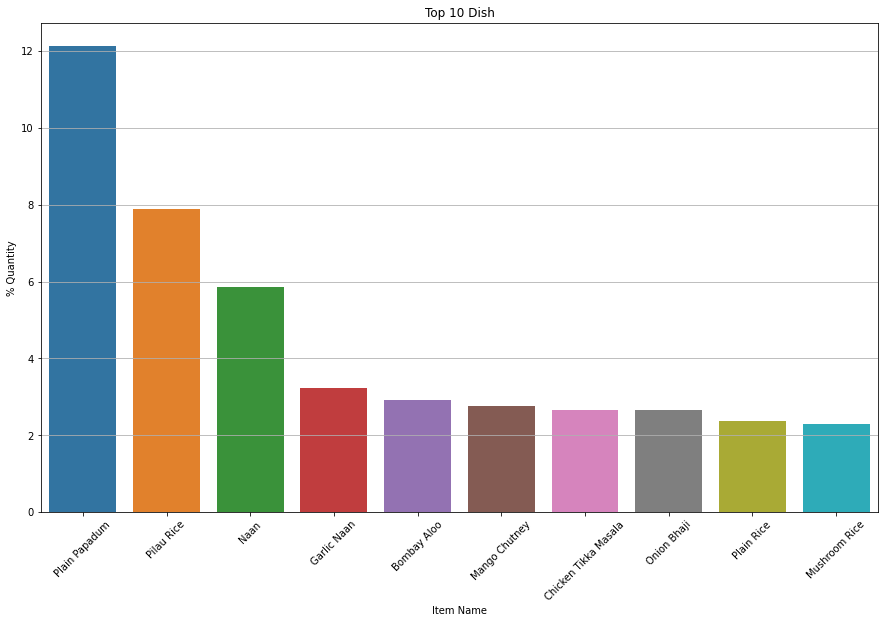

In [35]:
plt.figure(figsize=(15,9))
sns.barplot(x=Top10_Food['Item Name'], y=Top10_Food['% Quantity'])
plt.title('Top 10 Dish')
plt.xticks(rotation=45)
plt.ylabel('% Quantity')
plt.grid(axis='y')
plt.show()

## Checking Price per Product of Top 10 Dish

In [36]:
#rename column name to remove space
df = df.rename(columns={'Item Name':'Item'})
df.head()

,Order ID,Order Date,Item,Quantity,Product Price,Total products,Month,Month Name,Year,Day,Day_Num,Date of Month,WeekEnd,Month_Period,Week_in_Month,Hour,Total Price
0,25583,2019-03-08 21:58:00,Tandoori Mixed Grill,1,11.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,11.95
1,25583,2019-03-08 21:58:00,Madras Sauce,1,3.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,3.95
2,25583,2019-03-08 21:58:00,Mushroom Rice,2,3.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,7.90
3,25583,2019-03-08 21:58:00,Garlic Naan,1,2.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,2.95
4,25583,2019-03-08 21:58:00,Paratha,1,2.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,2.95


In [37]:
#rename column name to remove space
Top10_Food = Top10_Food.rename(columns={'Item Name':'Item'})
Top10_Food

,Item,Quantity,% Quantity
262,Plain Papadum,18056,12.13
261,Pilau Rice,11754,7.90
233,Naan,8730,5.87
123,Garlic Naan,4809,3.23
29,Bombay Aloo,4336,2.91
204,Mango Chutney,4124,2.77
64,Chicken Tikka Masala,3970,2.67
234,Onion Bhaji,3965,2.66
263,Plain Rice,3532,2.37
231,Mushroom Rice,3424,2.30


In [38]:
#rename column name to remove space
df_item_food = df_item_food.rename(columns={'Item Name':'Item'})
df_item_food

,Item,Quantity,% Quantity
262,Plain Papadum,18056,12.13
261,Pilau Rice,11754,7.90
233,Naan,8730,5.87
123,Garlic Naan,4809,3.23
29,Bombay Aloo,4336,2.91
...,...,...,...
91,Cylon - prawn,1,0.00
210,Methi - King Prawn,1,0.00
26,Bombay - Prawn,1,0.00
101,Dhansak - king-prawn,1,0.00


In [39]:
# filter main table (df) to get all column in main table but only the Top 10 Food

Price_per_Item = df[df.Item.isin(Top10_Food.Item)]

In [40]:
# Distinct the Food Item because we only want to see the Product Price

Price_per_Item = Price_per_Item.drop_duplicates(subset = ["Item"])

In [41]:
Price_per_Item[['Item','Product Price']].sort_values(by='Product Price')

,Item,Product Price
8,Mango Chutney,0.50
7,Plain Papadum,0.80
29,Naan,2.50
3,Garlic Naan,2.95
5,Plain Rice,2.95
13,Pilau Rice,2.95
2,Mushroom Rice,3.95
19,Onion Bhaji,3.95
49,Bombay Aloo,5.95
11,Chicken Tikka Masala,8.95


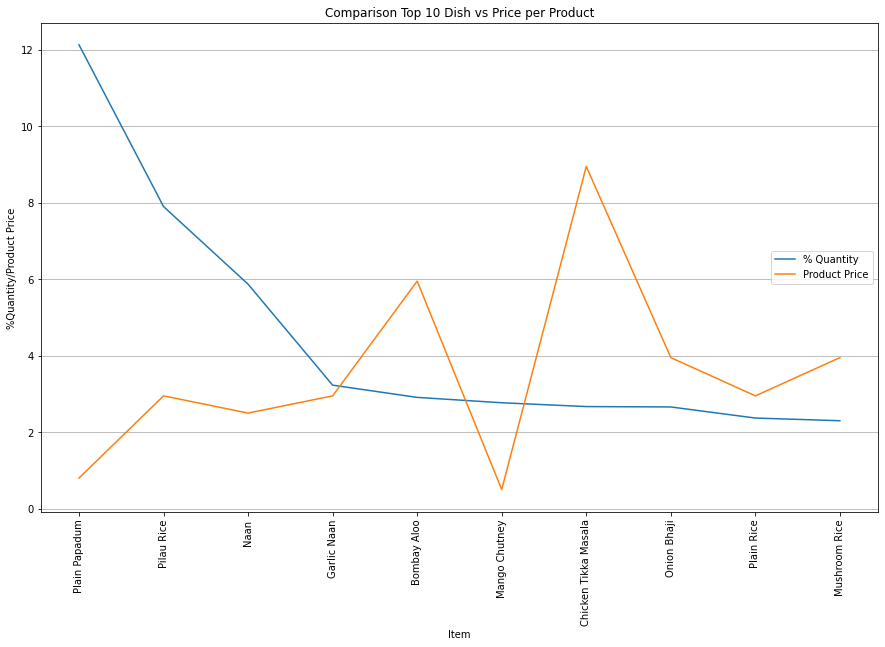

In [42]:
plt.figure(figsize=(15,9))
sns.lineplot(x = Top10_Food['Item'], y=Top10_Food['% Quantity'])
sns.lineplot(x = Price_per_Item['Item'], y=Price_per_Item['Product Price'])
plt.title('Comparison Top 10 Dish vs Price per Product')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.xlabel('Item')
plt.ylabel('%Quantity/Product Price')
plt.legend(['% Quantity', 'Product Price'],loc='center right')
plt.show()

From above graph, we conclude that the top 10 food doesn't affected by its price

## Checking The Most Expensive Food and its popularity

In [43]:
df_item_food.head()

,Item,Quantity,% Quantity
262,Plain Papadum,18056,12.13
261,Pilau Rice,11754,7.90
233,Naan,8730,5.87
123,Garlic Naan,4809,3.23
29,Bombay Aloo,4336,2.91


In [44]:
# merge main table (df) with percentage quantity table (df_item_food) to check expensive food

df_combined = pd.merge(df_item_food, df, how = 'left', on = ['Item','Item'])
df_combined

,Item,Quantity_x,% Quantity,Order ID,Order Date,Quantity_y,Product Price,Total products,Month,Month Name,Year,Day,Day_Num,Date of Month,WeekEnd,Month_Period,Week_in_Month,Hour,Total Price
0,Plain Papadum,18056,12.13,25583,2019-03-08 21:58:00,1,0.80,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,0.80
1,Plain Papadum,18056,12.13,25581,2019-03-08 20:01:00,1,0.80,5,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,20,0.80
2,Plain Papadum,18056,12.13,25574,2019-03-08 19:13:00,3,0.80,9,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,19,2.40
3,Plain Papadum,18056,12.13,25573,2019-03-08 19:11:00,1,0.80,8,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,19,0.80
4,Plain Papadum,18056,12.13,25572,2019-03-08 19:04:00,4,0.80,8,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,19,3.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119178,Cylon - prawn,1,0.00,16830,2018-03-06 17:44:00,1,9.95,6,3,March,2018,Tuesday,1,6,No,Month Beginning,First Week,17,9.95
119179,Methi - King Prawn,1,0.00,15971,2018-04-21 19:18:00,1,12.95,9,4,April,2018,Saturday,5,21,Yes,Month End,Third Week,19,12.95
119180,Bombay - Prawn,1,0.00,19913,2018-03-11 19:35:00,1,9.95,12,3,March,2018,Sunday,6,11,Yes,Month Beginning,Second Week,19,9.95
119181,Dhansak - king-prawn,1,0.00,16702,2018-05-28 15:54:00,1,12.95,3,5,May,2018,Monday,0,28,No,Month End,Fourth Week,15,12.95


In [45]:
df_combined[['Item','Product Price', '% Quantity']].sort_values(by='Product Price', ascending=False).drop_duplicates(subset = ["Item"]).head(10)

,Item,Product Price,% Quantity
115495,House white wine 75cl,17.95,0.05
118485,House Red wine 75cl,17.95,0.01
112754,King Prawn Biryani,12.95,0.08
117241,Jinga Chillies,12.95,0.03
116802,Kurma,12.95,0.04
119182,Saag - King Prawn,12.95,0.00
110622,King Prawn Shaslick,12.95,0.09
113355,King Prawn Royal,12.95,0.07
118369,Korma - King Prawn,12.95,0.02
117317,King Prawn Karahi,12.95,0.03


From data above, the 10 most expesinve food being takeaway order is having popularity less than 0.1%

In [46]:
df_combined[['Item','Product Price', '% Quantity']].sort_values(by='Product Price', ascending=True).drop_duplicates(subset = ["Item"]).head(10)

,Item,Product Price,% Quantity
48170,Mint Sauce,0.50,2.16
32934,Mango Chutney,0.50,2.77
65141,Red Sauce,0.50,1.14
55884,Onion Chutney,0.50,1.55
92619,Lime Pickle,0.50,0.29
75235,Spicy Papadum,0.80,0.69
0,Plain Papadum,0.80,12.13
53387,Chapati,1.95,1.61
116680,Dahi,1.95,0.04
100448,Puree,1.95,0.18


In [47]:
df_combined.head()

,Item,Quantity_x,% Quantity,Order ID,Order Date,Quantity_y,Product Price,Total products,Month,Month Name,Year,Day,Day_Num,Date of Month,WeekEnd,Month_Period,Week_in_Month,Hour,Total Price
0,Plain Papadum,18056,12.13,25583,2019-03-08 21:58:00,1,0.8,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,0.8
1,Plain Papadum,18056,12.13,25581,2019-03-08 20:01:00,1,0.8,5,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,20,0.8
2,Plain Papadum,18056,12.13,25574,2019-03-08 19:13:00,3,0.8,9,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,19,2.4
3,Plain Papadum,18056,12.13,25573,2019-03-08 19:11:00,1,0.8,8,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,19,0.8
4,Plain Papadum,18056,12.13,25572,2019-03-08 19:04:00,4,0.8,8,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,19,3.2


## Food with the most revenue

we can use this analysis to create menu package

In [48]:
df_combined[['Item', 'Year','Total Price']].groupby(['Item', 'Year']).agg(sum).sort_values('Total Price',ascending=False).head(10)

Total Price
Item                 Year             
Chicken Tikka Masala 2018     12682.15
Pilau Rice           2018     11770.50
Chicken Tikka Masala 2017     10901.10
Korma                2017     10410.05
Pilau Rice           2017     10392.85
Madras               2017      8649.65
Bombay Aloo          2018      8508.50
                     2017      7663.60
Pilau Rice           2019      7584.45
Naan                 2018      7415.00

Chicken Tikka Masala, Pilau Rice are the highest revenue food over year

## Menu Package Recommendation

In [49]:
# get Meal Time data to check favorite food over the day

def parse_values(x):
    if 7 <= x < 12:
       return 'Breakfast Hour'
    elif 12 <= x < 15:
       return 'Lunch Hour'
    elif 17 <= x < 22 :
       return 'Dinner Hour'
    else:
       return 'Normal Hour'

In [50]:
df['Meal_Time'] = df['Hour'].apply(parse_values)

In [51]:
df.head()

,Order ID,Order Date,Item,Quantity,Product Price,Total products,Month,Month Name,Year,Day,Day_Num,Date of Month,WeekEnd,Month_Period,Week_in_Month,Hour,Total Price,Meal_Time
0,25583,2019-03-08 21:58:00,Tandoori Mixed Grill,1,11.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,11.95,Dinner Hour
1,25583,2019-03-08 21:58:00,Madras Sauce,1,3.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,3.95,Dinner Hour
2,25583,2019-03-08 21:58:00,Mushroom Rice,2,3.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,7.90,Dinner Hour
3,25583,2019-03-08 21:58:00,Garlic Naan,1,2.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,2.95,Dinner Hour
4,25583,2019-03-08 21:58:00,Paratha,1,2.95,12,3,March,2019,Friday,4,8,No,Month Beginning,Second Week,21,2.95,Dinner Hour


In [52]:
#create table meal time for further analysis

df_Meal_Time = df[['Meal_Time','Item','Quantity']].groupby(['Meal_Time','Item'], as_index=False).agg(sum).sort_values('Quantity',ascending=False)
df_Meal_Time

,Meal_Time,Item,Quantity
412,Dinner Hour,Plain Papadum,17057
411,Dinner Hour,Pilau Rice,10896
383,Dinner Hour,Naan,8013
273,Dinner Hour,Garlic Naan,4461
180,Dinner Hour,Bombay Aloo,4095
...,...,...,...
780,Normal Hour,Curry - king-prawn,1
126,Breakfast Hour,Saag Bhajee,1
124,Breakfast Hour,Saag,1
790,Normal Hour,Dhansak - King Prawn,1


In [53]:
## Dinner Meal Time favorite takeaway

df_Meal_Time.loc[df_Meal_Time['Meal_Time']=='Dinner Hour'].head(15)

,Meal_Time,Item,Quantity
412,Dinner Hour,Plain Papadum,17057
411,Dinner Hour,Pilau Rice,10896
383,Dinner Hour,Naan,8013
273,Dinner Hour,Garlic Naan,4461
180,Dinner Hour,Bombay Aloo,4095
354,Dinner Hour,Mango Chutney,3839
215,Dinner Hour,Chicken Tikka Masala,3699
384,Dinner Hour,Onion Bhaji,3492
413,Dinner Hour,Plain Rice,3251
381,Dinner Hour,Mushroom Rice,3043


In [54]:
#Dinner Meal Time the least favorite takeaway

df_Meal_Time.loc[df_Meal_Time['Meal_Time']=='Dinner Hour'].tail(15)

,Meal_Time,Item,Quantity
434,Dinner Hour,Saag - Prawn,1
432,Dinner Hour,Saag - King Prawn,1
423,Dinner Hour,Rogon - King Prawn,1
406,Dinner Hour,Pathia - prawn,1
394,Dinner Hour,Paner Pakora,1
379,Dinner Hour,Mushroom - lamb,1
375,Dinner Hour,Mushroom - King Prawn,1
364,Dinner Hour,Methi - king-prawn,1
362,Dinner Hour,Methi - Prawn,1
360,Dinner Hour,Methi - King Prawn,1


In [55]:
## menu package recommendation
df_Meal_Time.loc[df_Meal_Time['Meal_Time']=='Breakfast Hour'].head(15)

,Meal_Time,Item,Quantity
117,Breakfast Hour,Plain Papadum,43
107,Breakfast Hour,Onion Bhaji,40
106,Breakfast Hour,Naan,38
146,Breakfast Hour,Vegetable Samosa,33
96,Breakfast Hour,Mango Chutney,29
99,Breakfast Hour,Mini Bhaji,26
100,Breakfast Hour,Mint Sauce,26
59,Breakfast Hour,Garlic Naan,25
116,Breakfast Hour,Pilau Rice,24
97,Breakfast Hour,Meat Samosa,20


In [56]:
## menu package recommendation
df_Meal_Time.loc[df_Meal_Time['Meal_Time']=='Breakfast Hour'].tail(15)

,Meal_Time,Item,Quantity
81,Breakfast Hour,Lamb Hari Mirch,1
80,Breakfast Hour,Lamb Chops (Main),1
79,Breakfast Hour,Lamb Chops,1
77,Breakfast Hour,Lamb Balti,1
76,Breakfast Hour,Lal Mirch Chicken,1
74,Breakfast Hour,Korma - chicken,1
73,Breakfast Hour,Korma - Chicken Tikka,1
123,Breakfast Hour,Royal Paneer,1
144,Breakfast Hour,Vegetable Korma,1
139,Breakfast Hour,Tandoori Paratha,1


In [57]:
## menu package recommendation
df_Meal_Time.loc[df_Meal_Time['Meal_Time']=='Lunch Hour'].head(15)

,Meal_Time,Item,Quantity
660,Lunch Hour,Plain Papadum,176
659,Lunch Hour,Pilau Rice,171
644,Lunch Hour,Onion Bhaji,164
643,Lunch Hour,Naan,151
568,Lunch Hour,Garlic Naan,83
632,Lunch Hour,Mini Bhaji,61
704,Lunch Hour,Vegetable Samosa,58
534,Lunch Hour,Chicken Tikka Masala,56
626,Lunch Hour,Mango Chutney,52
661,Lunch Hour,Plain Rice,51


In [58]:
## menu package recommendation
df_Meal_Time.loc[df_Meal_Time['Meal_Time']=='Lunch Hour'].tail(15)

,Meal_Time,Item,Quantity
501,Lunch Hour,Bombay - Lamb,1
579,Lunch Hour,King Prawn Balti,1
500,Lunch Hour,Bombay - Chicken,1
499,Lunch Hour,Bombay,1
588,Lunch Hour,Korma - Chicken Tikka,1
589,Lunch Hour,Korma - King Prawn,1
592,Lunch Hour,Korma - lamb,1
498,Lunch Hour,Bhuna - chicken,1
603,Lunch Hour,Lamb Rezala,1
604,Lunch Hour,Lamb Shashlick Curry,1


For menu package recommendation :

1. Combination of Plain Papadum and Pilau Rice, or Combination of Chicken Tikka Masala and Naan, are the perfect combination as every meal time, these items is being ordered. 
2. Onion Bhaji and Mango Chutney might be added in number 1 menu package as this side dish always orderd every meal time
3. Mint sauce might as well added in menu package 
4. The least favorite food : Saag, Saag Bhaji, Vegetable Bhuna, Vegetable Korma are good to be added in menu package to serve as vegetables dish
5. For Breakfast special menu, we can combine Meat Samosa + Mint Sauce + Saag in one package.



